In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_csv("cars_dataset.csv")
datos

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
# VER DARTOS VACIOS DE NUESTRO DATAFRAME
datos.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
datos_nuevos = pd.read_excel("cars_2.xlsx")
datos_nuevos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,450000
1,2014,5.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,370000
2,2006,5.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,158000
3,2010,5.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,225000
4,2007,5.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,290000


In [ ]:
datos_nuevos.isnull().sum()

year               0
seats            221
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
selling_price      0
dtype: int64

In [ ]:
# TRATAR DATOS DE NUESTRO - CONVERTIR DE STRING A INT XD
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datos_nuevos["fuel"] = le.fit_transform(datos_nuevos["fuel"])
datos_nuevos["seller_type"] = le.fit_transform(datos_nuevos["seller_type"])
datos_nuevos["transmission"] = le.fit_transform(datos_nuevos["transmission"])
datos_nuevos["owner"] = le.fit_transform(datos_nuevos["owner"])

In [ ]:
datos_nuevos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [ ]:
#datos_nuevos.drop(['max_power'], axis =1)

In [ ]:
datos_nuevos = datos_nuevos.fillna(datos_nuevos.mean()) # Reemplazar los NaN con el valor promedio de cada columna:
datos_nuevos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [ ]:
datos_nuevos.isnull().sum()

year             0
seats            0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


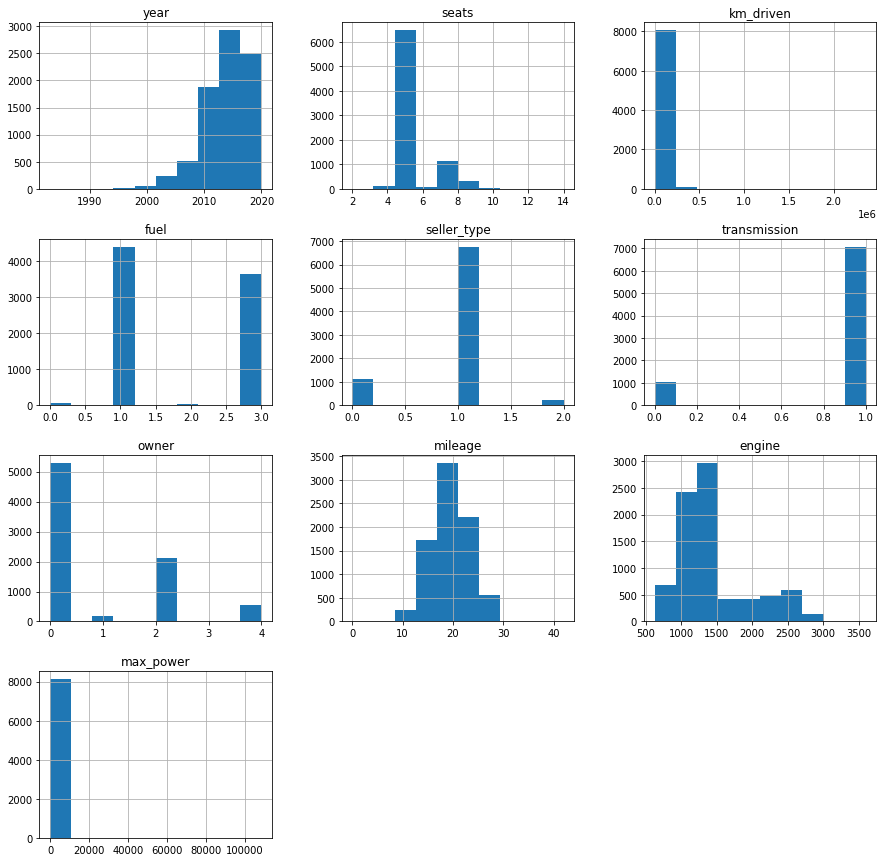

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 15)        # TAMAÑO DEL GRÁFICO

datos_nuevos.drop(['selling_price'],1).hist()    # GRAFICANDO - en base al precio del auto 
plt.show()

In [ ]:
# NORMALIZAR LOS DATOS
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datos_normalizados = mean_norm(datos_nuevos)
print(datos_normalizados)

          year     seats  km_driven      fuel  seller_type  transmission  \
0     0.047977 -0.440093   1.338389 -0.889557      0.27759      0.385135   
1     0.047977 -0.440093   0.887458 -0.889557      0.27759      0.385135   
2    -1.931485 -0.440093   1.241129  1.106115      0.27759      0.385135   
3    -0.941754 -0.440093   1.011243 -0.889557      0.27759      0.385135   
4    -1.684052 -0.440093   0.887458  1.106115      0.27759      0.385135   
...        ...       ...        ...       ...          ...           ...   
8123 -0.199456 -0.440093   0.710622  1.106115      0.27759      0.385135   
8124 -1.684052 -0.440093   0.869775 -0.889557      0.27759      0.385135   
8125 -1.189187 -0.440093   0.887458 -0.889557      0.27759      0.385135   
8126 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   
8127 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   

         owner   mileage    engine  max_power  selling_price  
0    -0.666598  0.999676

In [ ]:
# SELECCIONAR LAS COLUMNAS A TRABAJAR
X = datos_normalizados.iloc[:,:10]            # todas las columnas excepto la de precios
#y = datos_normalizados.iloc[:,10:]             # la columna precios 
y = datos_normalizados["selling_price"]

X

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [ ]:
y

0      -0.233507
1      -0.332731
2      -0.595675
3      -0.512575
4      -0.630403
          ...   
8123   -0.394746
8124   -0.624202
8125   -0.317848
8126   -0.431955
8127   -0.431955
Name: selling_price, Length: 8128, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# REGRESION LINEAL
regresion_lineal_multiple = LinearRegression()

In [ ]:
# ENTRENANDO EL ALGORITMO
regresion_lineal_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
# PREDICCIONES
y_pred = regresion_lineal_multiple.predict(X_test)

In [ ]:
df_comparacion = pd.DataFrame({'ACTUAL': y_test, 'PREDICCION': y_pred})
df_comparacion.head(20)

,ACTUAL,PREDICCION
3494,-0.723426,-0.930682
7160,0.020754,-0.036776
4151,0.324627,0.027936
5519,0.338271,0.409477
7851,0.138583,-0.395526
2306,-0.562187,-0.541651
4541,-0.357537,-0.424275
3639,-0.419552,-0.275722
5455,0.045560,-0.163489
3135,0.157187,-0.146424


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))   # funcion costo = error cuadratico xd
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3800843902880946
Mean Squared Error: 0.46389757252748587
Root Mean Squared Error: 0.6811002661337653


In [ ]:
nuestra_pred = ([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]])
nuestra_pred2 = ([[2014, 5, 145500, 1, 1, 1, 0, 23.40, 1248, 74]])

In [ ]:
print("NUESTRA PREDICCION: ", regresion_lineal_multiple.predict(nuestra_pred))

NUESTRA PREDICCION:  [-0.3201785]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from google.colab import files
files.download('datos_normalizados.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>